<a href="https://colab.research.google.com/github/benjaminsw/Generalised_Linear_Models/blob/main/R_cars_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
if (!require('gsheet')) install.packages('gsheet'); library('gsheet')
if (!require('ggplot2')) install.packages('ggplot2'); library('ggplot2')
if (!require('gridExtra')) install.packages('gridExtra'); library('gridExtra')
if (!require('nnet')) install.packages('nnet'); library('nnet')
if (!require('ggeffects')) install.packages('ggeffects'); library('ggeffects')
if (!require('MASS')) install.packages('MASS'); library('MASS')

if (!require('sjPlot')) install.packages('sjPlot'); library('sjPlot')
#if (!require('devtools')) install.packages('devtools'); library('devtools')
#devtools::install_github("strengejacke/sjPlot")

# set plot size
options(repr.plot.width=16, repr.plot.height=8)

Loading required package: sjPlot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘sjPlot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘nloptr’, ‘lme4’, ‘sjstats’


Warning message in install.packages("sjPlot"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("sjPlot"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("sjPlot"):
“installation of package ‘sjstats’ had non-zero exit status”
Warning message in install.packages("sjPlot"):
“installation of package ‘sjPlot’ had non-zero exit status”


ERROR: ignored

In [7]:
url <- 'https://docs.google.com/spreadsheets/d/1XQqBJwWZnFIeADsmr7bBXDY0hS49GaxEqypM8bgGlYc/edit?usp=sharing'
cars <- gsheet2tbl(url)
cars$resp <- factor(cars$response, levels=c("no/little", "important", "very important"))
cars

sex,age,response,frequency,resp
<chr>,<chr>,<chr>,<dbl>,<fct>
women,18-23,no/little,26,no/little
women,18-23,important,12,important
women,18-23,very important,7,very important
women,24-40,no/little,9,no/little
women,24-40,important,21,important
women,24-40,very important,15,very important
women,> 40,no/little,5,no/little
women,> 40,important,14,important
women,> 40,very important,41,very important


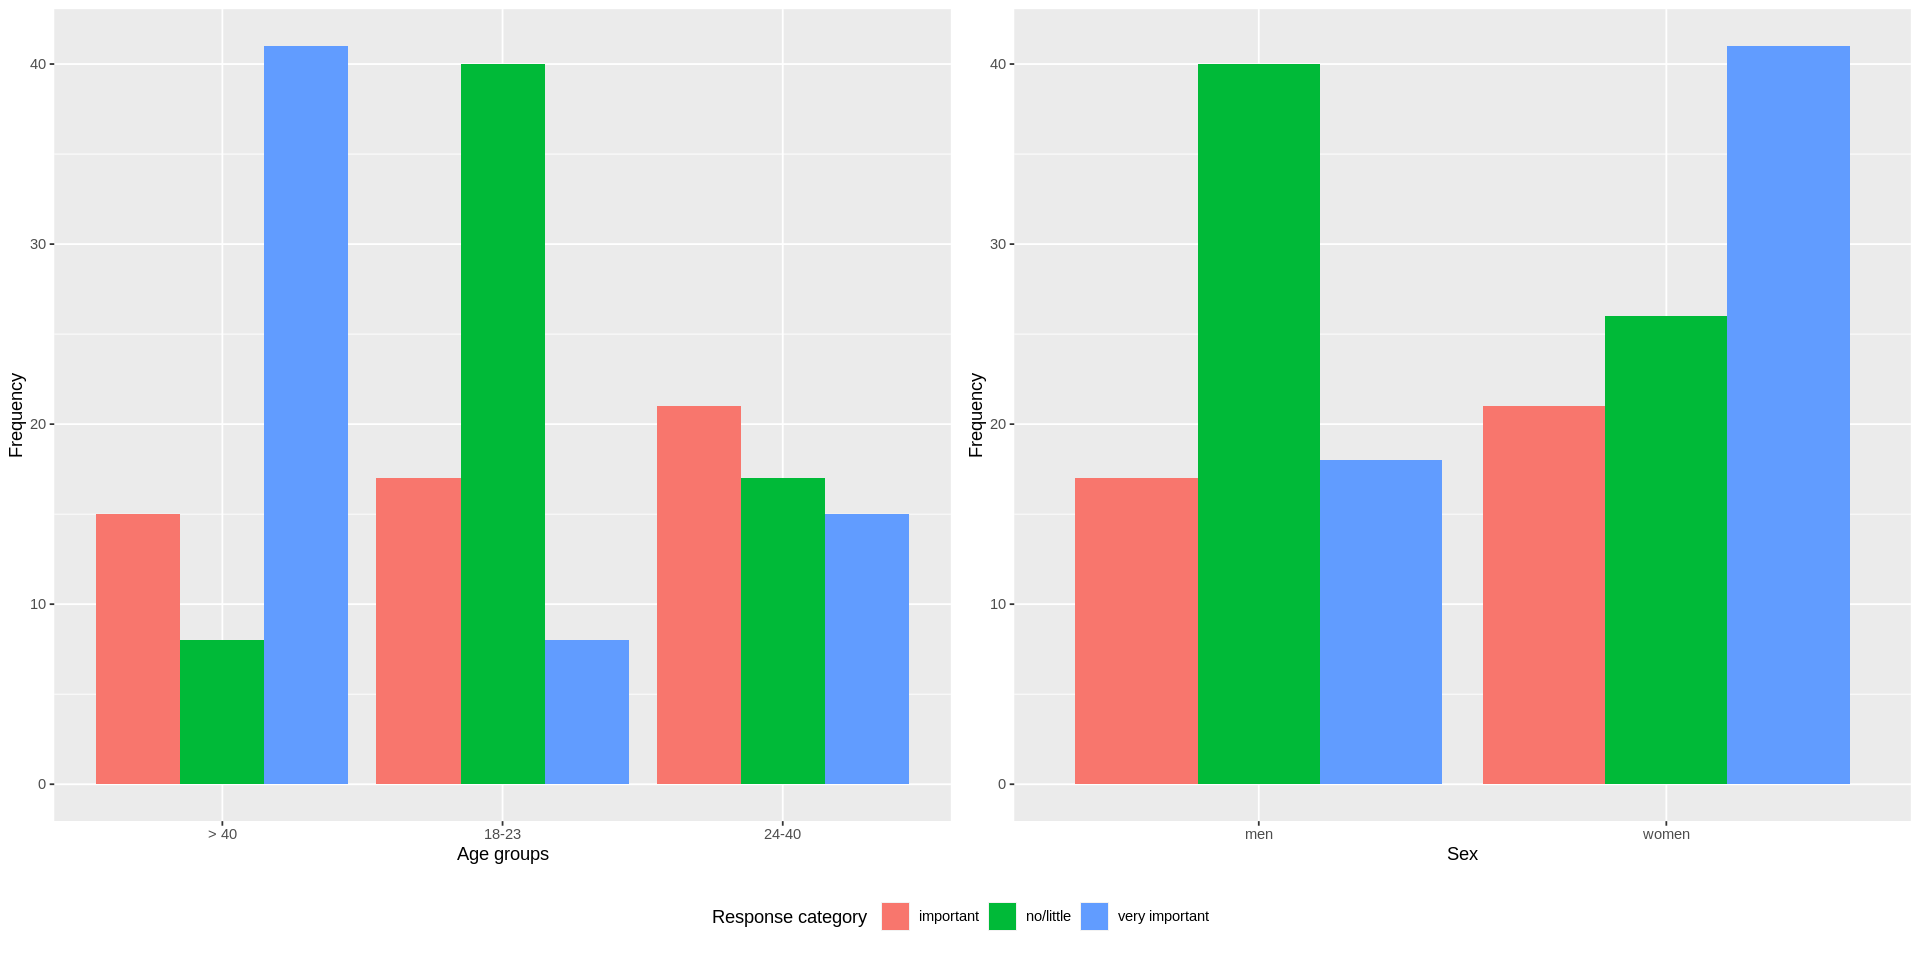

In [8]:
g_legend <- function(a.gplot){
  tmp <- ggplot_gtable(ggplot_build(a.gplot))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)}

p1 <- ggplot(cars, aes(x = cars$age, y = cars$frequency, fill = response)) +
  geom_bar(stat = "identity", position = "dodge")+
  xlab("Age groups") + ylab("Frequency") +
  theme(legend.position = "none")

  p2 <- ggplot(cars, aes(x = cars$sex, y = cars$frequency, fill = response)) +
  geom_bar(stat = "identity", position = "dodge")+
  xlab("Sex") + ylab("Frequency") +
  scale_fill_discrete(name = "Response category") + 
  theme(legend.position = "bottom")

carsLeg <- g_legend(p2)
grid.arrange(arrangeGrob(p1 + theme(legend.position="none"),
                         p2 + theme(legend.position="none"),
                         nrow=1), nrow = 2, carsLeg, heights=c(10, 1))

In [9]:
m1 <- multinom(resp~age+sex, weight=frequency, data=cars)
summary(m1)

# weights:  15 (8 variable)
initial  value 329.583687 
iter  10 value 290.511620
final  value 290.351098 
converged


Call:
multinom(formula = resp ~ age + sex, data = cars, weights = frequency)

Coefficients:
               (Intercept)  age18-23   age24-40  sexwomen
important         0.608781 -1.587697 -0.4594392 0.3881190
very important    1.064651 -2.916749 -1.4386341 0.8130152

Std. Errors:
               (Intercept)  age18-23  age24-40  sexwomen
important        0.3652676 0.4028982 0.4226840 0.3005110
very important   0.3496457 0.4229275 0.4158218 0.3210382

Residual Deviance: 580.7022 
AIC: 596.7022 

In [10]:
# Null model:
m0 <- multinom(resp~1, weight=frequency, data=cars)
summary(m0)

# weights:  6 (2 variable)
initial  value 329.583687 
final  value 329.272024 
converged


Call:
multinom(formula = resp ~ 1, data = cars, weights = frequency)

Coefficients:
               (Intercept)
important      -0.11066559
very important -0.03883986

Std. Errors:
               (Intercept)
important        0.1419933
very important   0.1393729

Residual Deviance: 658.544 
AIC: 662.544 

In [11]:
# Plot of coefficient estimates on odds ratio scale:
plot_model(m1)

ERROR: ignored

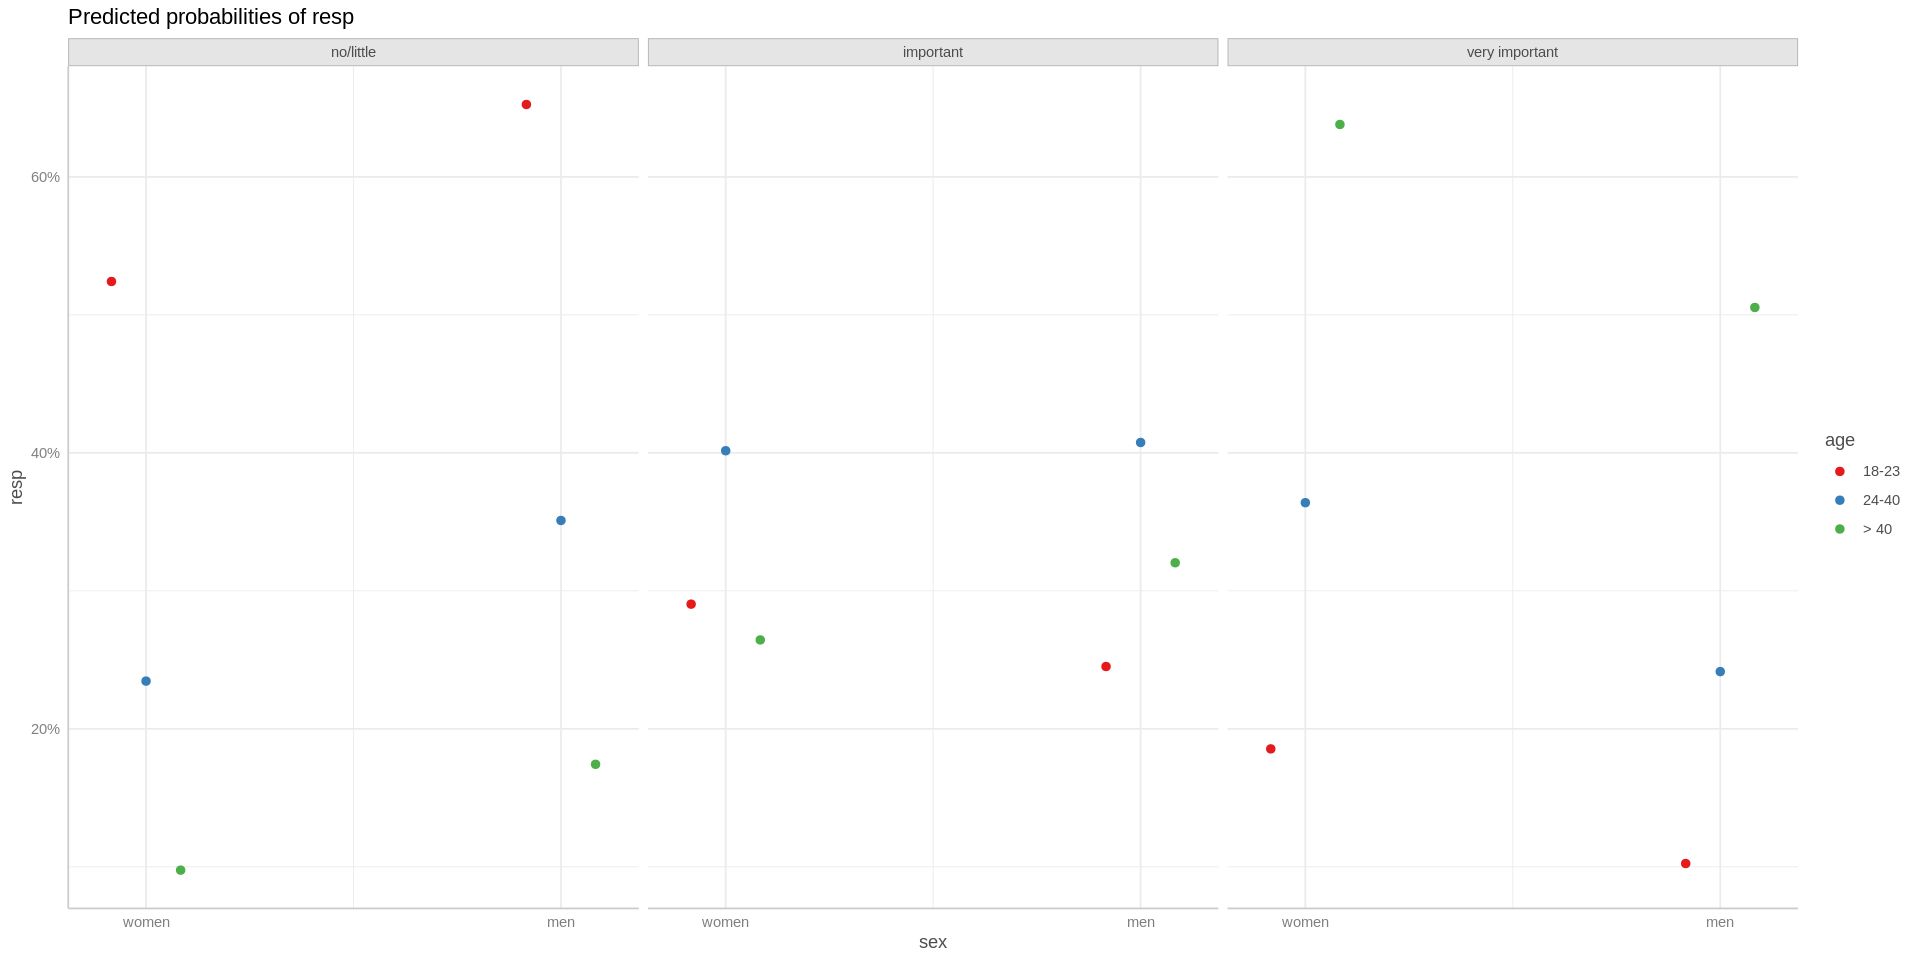

In [12]:
# Plot of predicted probabilities (fitted values):
p1 <- ggpredict(m1, c("sex", "age"))
plot(p1)

In [13]:
m2 <- multinom(resp~age*sex, weight=frequency, data=cars)
summary(m2)

# weights:  21 (12 variable)
initial  value 329.583687 
iter  10 value 288.669790
final  value 288.381742 
converged


Call:
multinom(formula = resp ~ age * sex, data = cars, weights = frequency)

Coefficients:
               (Intercept)  age18-23   age24-40 sexwomen age18-23:sexwomen
important        0.6286717 -1.484289 -0.7538545 0.400779        -0.3183313
very important   0.8107828 -2.420116 -1.1591118 1.293297        -0.9962267
               age24-40:sexwomen
important              0.5717662
very important        -0.4341134

Std. Errors:
               (Intercept)  age18-23  age24-40  sexwomen age18-23:sexwomen
important        0.4377836 0.5248593 0.5631557 0.6804957         0.8177344
very important   0.4249191 0.5749322 0.5680785 0.6363416         0.8580500
               age24-40:sexwomen
important              0.8644638
very important         0.8513933

Residual Deviance: 576.7635 
AIC: 600.7635 

In [14]:
anova(m1,m2)

Model,Resid. df,Resid. Dev,Test,Df,LR stat.,Pr(Chi)
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
age + sex,28,580.7022,,NA,NA,NA
age * sex,24,576.7635,1 vs 2,4,3.938712,0.4143638


In [15]:
# Linear term for age:
cars$agelin <- 0
cars$agelin[cars$age=="24-40"] <- 1
cars$agelin[cars$age=="> 40"] <- 2
cars

sex,age,response,frequency,resp,agelin
<chr>,<chr>,<chr>,<dbl>,<fct>,<dbl>
women,18-23,no/little,26,no/little,0
women,18-23,important,12,important,0
women,18-23,very important,7,very important,0
women,24-40,no/little,9,no/little,1
women,24-40,important,21,important,1
women,24-40,very important,15,very important,1
women,> 40,no/little,5,no/little,2
women,> 40,important,14,important,2
women,> 40,very important,41,very important,2


In [16]:
m3 <- multinom(resp~agelin+sex, weight=frequency, data=cars)
summary(m3)

# weights:  12 (6 variable)
initial  value 329.583687 
iter  10 value 291.050616
final  value 291.050160 
converged


Call:
multinom(formula = resp ~ agelin + sex, data = cars, weights = frequency)

Coefficients:
               (Intercept)    agelin  sexwomen
important       -0.8908983 0.8303799 0.3889732
very important  -1.9053456 1.5214463 0.8130386

Std. Errors:
               (Intercept)    agelin  sexwomen
important        0.2402679 0.1946354 0.2991328
very important   0.3089657 0.2114578 0.3211055

Residual Deviance: 582.1003 
AIC: 594.1003 

In [17]:
plot_model(m3)

ERROR: ignored

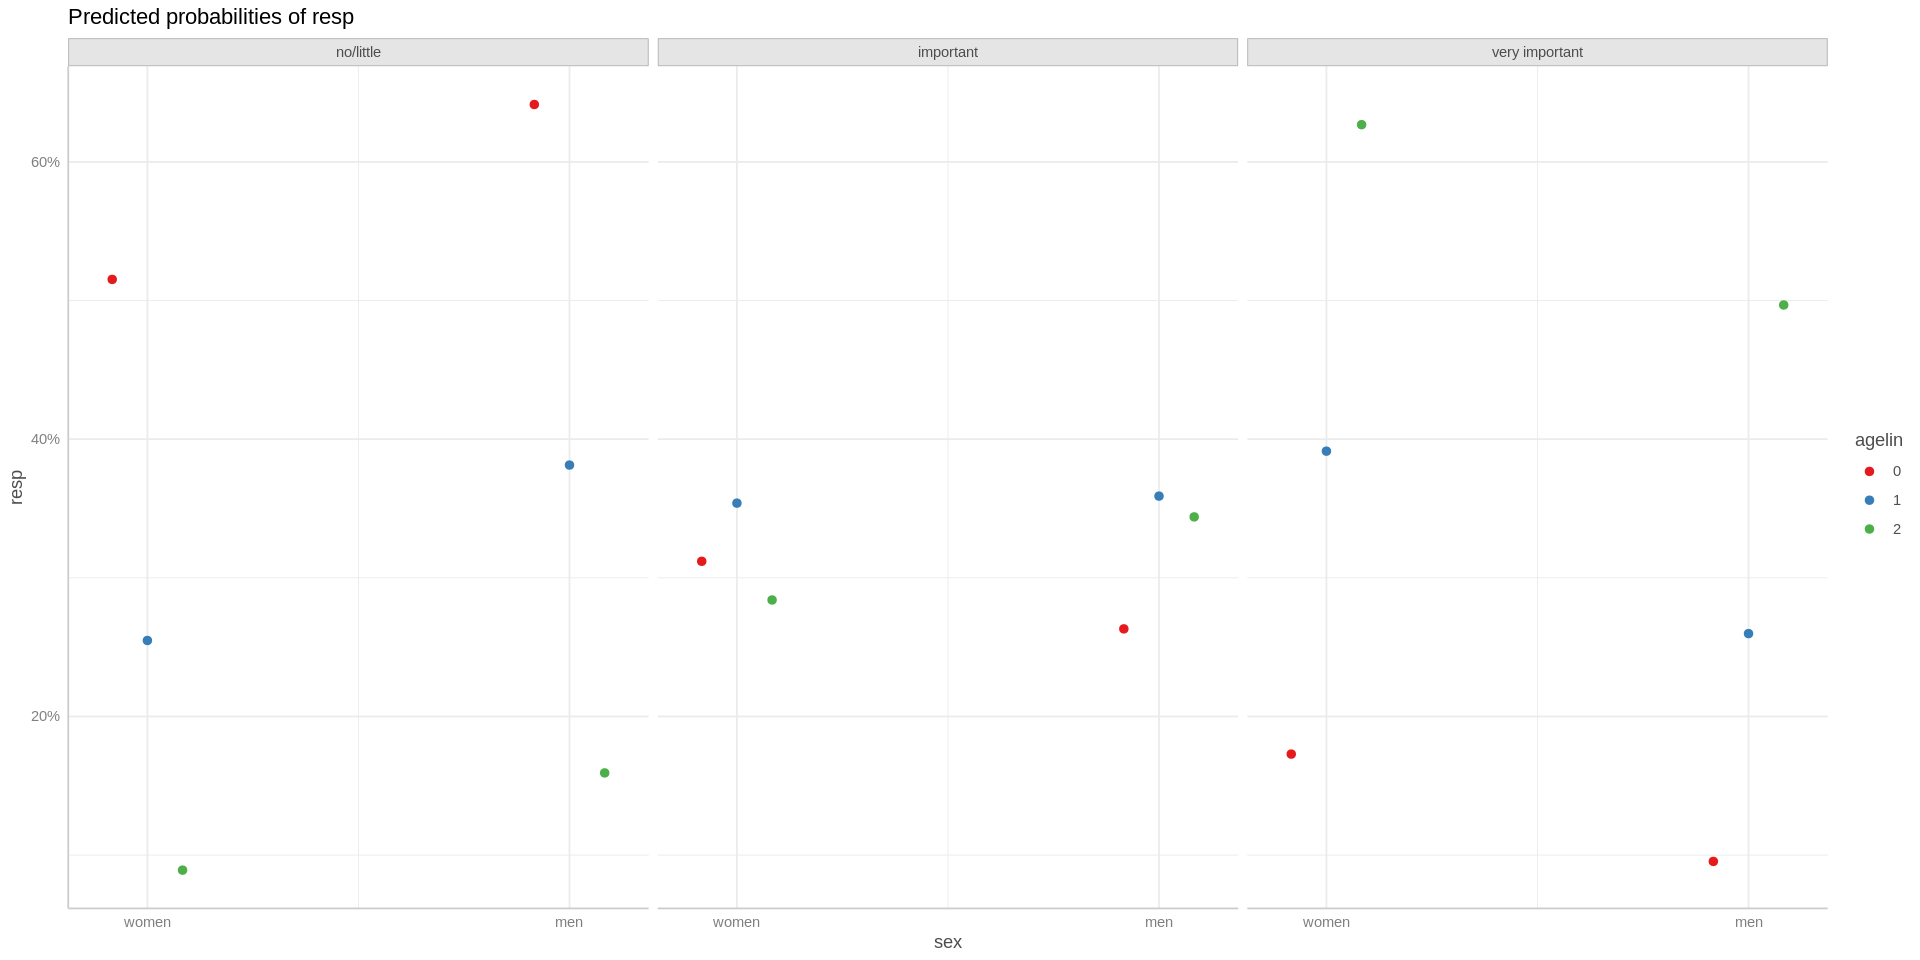

In [18]:
# Fitted values (predicted probabilities):
p3 <- ggpredict(m3, c("sex", "agelin"))
plot(p3)

In [19]:
m4 <- polr(resp ~ sex + age, data=cars, weight=frequency)
summary(m4)


Re-fitting to get Hessian




Call:
polr(formula = resp ~ sex + age, data = cars, weights = frequency)

Coefficients:
           Value Std. Error t value
sexwomen  0.5762     0.2262   2.548
age18-23 -2.2325     0.2915  -7.659
age24-40 -1.0854     0.2799  -3.877

Intercepts:
                         Value   Std. Error t value
no/little|important      -1.6127  0.2584    -6.2402
important|very important -0.0013  0.2369    -0.0053

Residual Deviance: 581.2956 
AIC: 591.2956 

In [20]:
# Could also try a model with a linear term for age
m5 <- polr(resp ~ sex + agelin, data=cars, weight=frequency)
summary(m5)


Re-fitting to get Hessian




Call:
polr(formula = resp ~ sex + agelin, data = cars, weights = frequency)

Coefficients:
         Value Std. Error t value
sexwomen 0.577     0.2261   2.552
agelin   1.116     0.1457   7.660

Intercepts:
                         Value  Std. Error t value
no/little|important      0.6101 0.2034     2.9999 
important|very important 2.2214 0.2430     9.1426 

Residual Deviance: 581.3124 
AIC: 589.3124 

In [21]:
# Predicted probabilities:
p5 <- ggpredict(m5)
plot(p5)


Re-fitting to get Hessian




ERROR: ignored